In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("SMSSpamHam.csv")
pd.set_option('display.max_columns', 10)
header = ["data"]
df.columns = header
df.head()

,data
0,ham\tOk lar... Joking wif u oni...
1,spam\tFree entry in 2 a wkly comp to win FA Cu...
2,ham\tU dun say so early hor... U c already the...
3,"ham\tNah I don't think he goes to usf, he live..."
4,spam\tFreeMsg Hey there darling it's been 3 we...


In [58]:
df.shape

(5573, 1)

In [59]:
 df[["label","content"]] = df["data"].str.split('\t' ,1, expand=True)

In [60]:
df.drop(columns=['data'], inplace=True)
df

,label,content
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [61]:
missing_values = df.isnull().sum()
print(missing_values)

label      0
content    0
dtype: int64


In [62]:
dup = df["content"].duplicated().sum()
print(dup)

414


In [63]:
df.drop_duplicates(inplace=True)

In [64]:
dup = df["content"].duplicated().sum()
print(dup)

0


In [65]:
df.shape

(5159, 2)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5159 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5159 non-null   object
 1   content  5159 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [68]:
X = df["content"]
Y = df["label"]

In [69]:
X = X.values
X

array(['Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...', ...,
       'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [70]:
Y = Y.values
Y

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [72]:
Y

array([0, 1, 0, ..., 0, 0, 0])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train_vectorized, y_train)

LogisticRegression()

In [79]:
training_accuracy = logreg.score(X_train_vectorized, y_train)
print("Accuracy on training data:", training_accuracy)

Accuracy on training data: 0.9978192391567725


In [81]:
y_pred = logreg.predict(X_test_vectorized)

In [90]:
testing_accuracy = logreg.score(X_test_vectorized, y_test)
print("Accuracy on testing data:", testing_accuracy)

Accuracy on testing data: 0.9796511627906976


In [91]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[895,   5],
       [ 16, 116]])

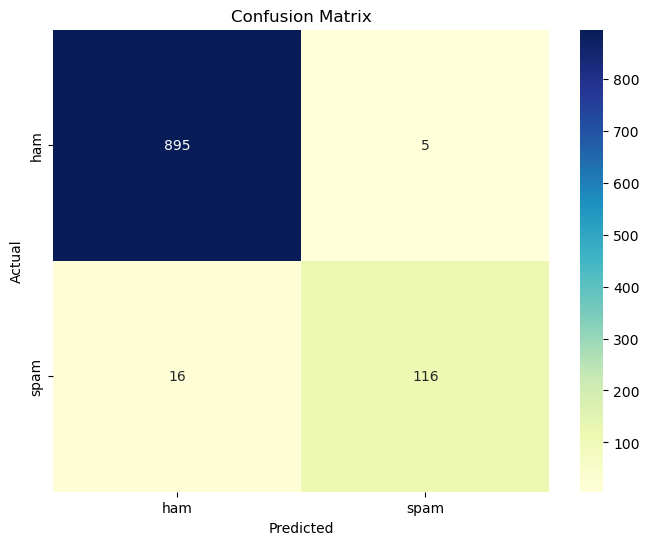

In [94]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [95]:
from sklearn.metrics import classification_report
target_names = ['ham', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       900
        spam       0.96      0.88      0.92       132

    accuracy                           0.98      1032
   macro avg       0.97      0.94      0.95      1032
weighted avg       0.98      0.98      0.98      1032

